In [15]:
%matplotlib inline
import os.path as op

import gensim
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
from PIL import Image
from pycocotools.coco import COCO

from retrieval_pipelines import absolute_coco_path, tag_to_image_search
from text_processing import sentence2vec, create_caption_dataframe
from tools import intersect_sort
from word2vec import compute_textual_features

ImportError: No module named 'tools'

In [2]:
tag = "sport"

In [3]:
# print('\nLoading word2vec model ...')
# path = op.join('models', 'GoogleNews-vectors-negative300.bin')
# model = gensim.models.Word2Vec.load_word2vec_format(path, binary=True)

In [4]:
# tag_features = sentence2vec(tag, model)
# del model
tag_features = np.load("{0}_features.npy".format(tag))

In [5]:
data_dir = "dataset"
data_type = "train2014"
ann_file = op.join(
    data_dir, "annotations", "instances_{0}.json".format(data_type))
coco = COCO(ann_file)

loading annotations into memory...
Done (t=13.72s)
creating index...
index created!


In [6]:
W_visual = np.load("W1.npy")
W_text = np.load("W2.npy")
V = np.load("V.npy")
img_ids = np.load("visual_img_ids.npy")
W_text = W_text.T
W_visual = W_visual.T

In [7]:
database_images = W_visual.dot(V.T)
database_images = database_images.T

In [8]:
retrieved_img_ids = tag_to_image_search(tag_features, W_text, database_images, img_ids, coco, n_images=3)
img_paths = [absolute_coco_path(int(img_id), coco) for img_id in retrieved_img_ids]

In [9]:
# np.save("{0}_features".format(tag), tag_features)

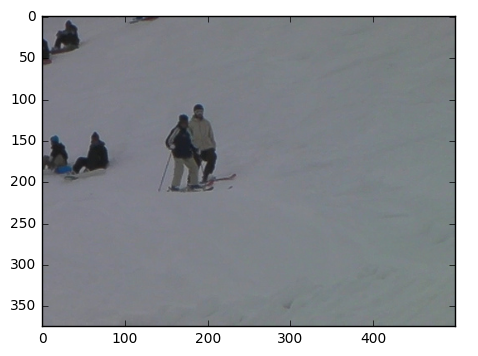

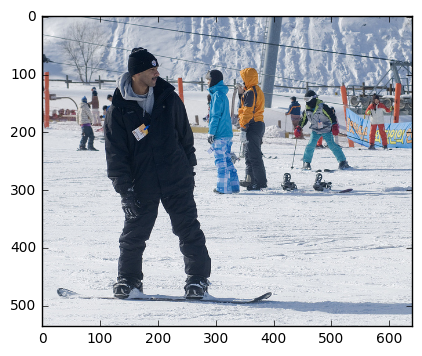

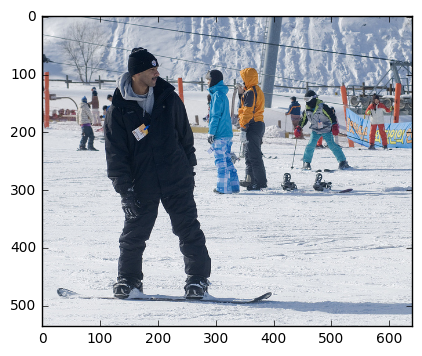

In [11]:
for im_idx, img_path in enumerate(img_paths):
    plt.figure(im_idx)
    img = mpimg.imread(img_path)
    imgplot = plt.imshow(img)

In [14]:
df_caption = create_caption_dataframe()
T = compute_textual_features(df_caption)
textual_img_ids = df_caption.index.values
# Take only the features corresponding to common ids and sort by id
V, visual_img_ids, T, textual_img_ids = intersect_sort(V, img_ids, T, textual_img_ids)
np.save("T", T)

NameError: name 'intersect_sort' is not defined